In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates

In [3]:
df_shift=pd.read_csv("shift_series.csv")
df_shift['time'] = pd.to_datetime(df_shift['time'])
df_shift['time']

0        2017-12-31 18:00:00
1        2017-12-31 18:30:00
2        2017-12-31 19:00:00
3        2017-12-31 19:30:00
4        2017-12-31 20:00:00
                 ...        
124856   2025-06-03 11:30:00
124857   2025-06-03 12:00:00
124858   2025-06-03 12:30:00
124859   2025-06-03 13:00:00
124860   2025-06-03 13:30:00
Name: time, Length: 124861, dtype: datetime64[ns]

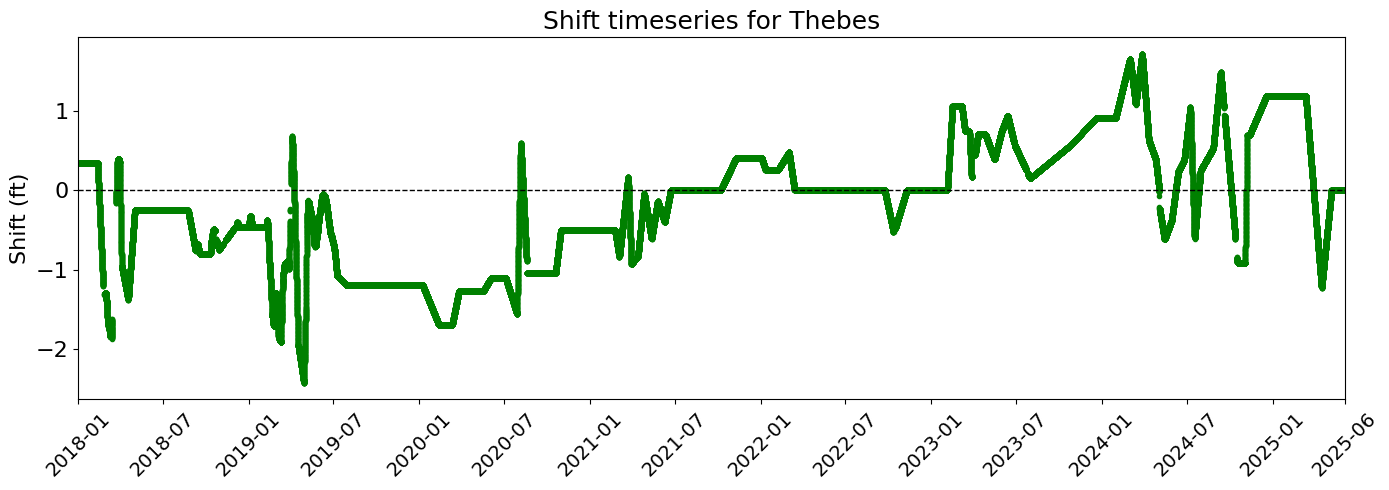

In [15]:
t0 = pd.Timestamp('2018-01-01 00:00:00')
t1 = pd.to_datetime(df_shift['time'].max())

fig, ax = plt.subplots(figsize=(14,5))
ax.scatter(df_shift['time'], df_shift['shift_ft'], marker='.', color='green')
ax.set_ylabel('Shift (ft)', fontsize=16)
ax.set_title('Shift timeseries for Thebes', fontsize=18)
ax.axhline(y=0, color='black', linestyle='--', linewidth=1)
ax.set_xlim(t0, t1)

# ticks/formatter
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.setp(ax.get_xticklabels(), rotation=45, fontsize=14)
plt.yticks(fontsize=16)

# add the last date tick safely
last_num = mdates.date2num(t1)
ticks = ax.get_xticks()
ticks = np.unique(np.append(ticks, last_num))
ax.set_xticks(ticks)

plt.tight_layout()
plt.show()